## 4(1) LGBM&CAT
221010일 학습시킨 모델의 코드이다. 최종적으로 LGBM을 택했으며 4.0007942082이 나왔다.

### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
train = pd.read_csv('../data/feature/20221010_train.csv')
test = pd.read_csv('../data/feature/20221010_test.csv')

In [3]:
# Feature가 아닌 변수를 제거한다.
train_id, test_id = train['id'], test['id'] ; del train['id'], test['id']

# X_train, y_train, X_test를 지정한다
y_train = train['target'] ; del train['target']
X_train, X_test = train, test
print('X_train.shape:', X_train.shape, 'X_test.shape', X_test.shape)

X_train.shape: (4701217, 35) X_test.shape (291241, 35)


### $\blacktriangleright$ LGBM

In [5]:
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.03, metric= 'mae', random_state = 2022)

In [8]:
lgbm_pred = np.zeros(X_test.shape[0])

# OutofFold를 사용한다.
SKF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
for tr_idx, val_idx in SKF.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    lgbm_reg.fit(tr_x, tr_y, eval_set=[(val_x, val_y)], verbose=True)
    lgbm_pred += np.array(lgbm_reg.predict(X_test)) / 5  # averaging

C:\Users\ha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 12.9657
[2]	valid_0's l1: 12.7164
[3]	valid_0's l1: 12.4788
[4]	valid_0's l1: 12.2489
[5]	valid_0's l1: 12.0226
[6]	valid_0's l1: 11.8102
[7]	valid_0's l1: 11.604
[8]	valid_0's l1: 11.4096
[9]	valid_0's l1: 11.2188
[10]	valid_0's l1: 11.0365
[11]	valid_0's l1: 10.8579
[12]	valid_0's l1: 10.688
[13]	valid_0's l1: 10.5243
[14]	valid_0's l1: 10.3672
[15]	valid_0's l1: 10.2166
[16]	valid_0's l1: 10.068
[17]	valid_0's l1: 9.92696
[18]	valid_0's l1: 9.78614
[19]	valid_0's l1: 9.65736
[20]	valid_0's l1: 9.52675
[21]	valid_0's l1: 9.40372
[22]	valid_0's l1: 9.28755
[23]	valid_0's l1: 9.17304
[24]	valid_0's l1: 9.06501
[25]	valid_0's l1: 8.95633
[26]	valid_0's l1: 8.85638
[27]	valid_0's l1: 8.75422
[28]	valid_0's l1: 8.65588
[29]	valid_0's l1: 8.56091
[30]	valid_0's l1: 8.47001
[31]	valid_0's l1: 8.37664
[32]	valid_0's l1: 8.2904
[33]	valid_0's l1: 8.2069
[34]	valid_0's l1: 8.12616
[35]	valid_0's l1: 8.05076
[36]	valid_0's l1: 7.97647
[37]	valid_0's l1: 7.9036
[38]	valid_0's l

[301]	valid_0's l1: 4.53347
[302]	valid_0's l1: 4.53148
[303]	valid_0's l1: 4.52808
[304]	valid_0's l1: 4.52547
[305]	valid_0's l1: 4.52323
[306]	valid_0's l1: 4.52057
[307]	valid_0's l1: 4.51796
[308]	valid_0's l1: 4.51607
[309]	valid_0's l1: 4.5144
[310]	valid_0's l1: 4.51047
[311]	valid_0's l1: 4.50716
[312]	valid_0's l1: 4.50338
[313]	valid_0's l1: 4.50119
[314]	valid_0's l1: 4.49969
[315]	valid_0's l1: 4.49751
[316]	valid_0's l1: 4.49631
[317]	valid_0's l1: 4.49387
[318]	valid_0's l1: 4.49206
[319]	valid_0's l1: 4.48866
[320]	valid_0's l1: 4.48575
[321]	valid_0's l1: 4.48345
[322]	valid_0's l1: 4.48131
[323]	valid_0's l1: 4.47908
[324]	valid_0's l1: 4.47699
[325]	valid_0's l1: 4.47557
[326]	valid_0's l1: 4.47345
[327]	valid_0's l1: 4.47238
[328]	valid_0's l1: 4.46899
[329]	valid_0's l1: 4.46759
[330]	valid_0's l1: 4.46391
[331]	valid_0's l1: 4.46196
[332]	valid_0's l1: 4.46022
[333]	valid_0's l1: 4.45875
[334]	valid_0's l1: 4.45646
[335]	valid_0's l1: 4.45317
[336]	valid_0's l1: 4

[599]	valid_0's l1: 4.04857
[600]	valid_0's l1: 4.0473
[601]	valid_0's l1: 4.04595
[602]	valid_0's l1: 4.04524
[603]	valid_0's l1: 4.04399
[604]	valid_0's l1: 4.04354
[605]	valid_0's l1: 4.04244
[606]	valid_0's l1: 4.04183
[607]	valid_0's l1: 4.0406
[608]	valid_0's l1: 4.03982
[609]	valid_0's l1: 4.03953
[610]	valid_0's l1: 4.03885
[611]	valid_0's l1: 4.03762
[612]	valid_0's l1: 4.03704
[613]	valid_0's l1: 4.03615
[614]	valid_0's l1: 4.03562
[615]	valid_0's l1: 4.03444
[616]	valid_0's l1: 4.0337
[617]	valid_0's l1: 4.03208
[618]	valid_0's l1: 4.0314
[619]	valid_0's l1: 4.03071
[620]	valid_0's l1: 4.03029
[621]	valid_0's l1: 4.02959
[622]	valid_0's l1: 4.02906
[623]	valid_0's l1: 4.02848
[624]	valid_0's l1: 4.02724
[625]	valid_0's l1: 4.02673
[626]	valid_0's l1: 4.02493
[627]	valid_0's l1: 4.02338
[628]	valid_0's l1: 4.02214
[629]	valid_0's l1: 4.02034
[630]	valid_0's l1: 4.01957
[631]	valid_0's l1: 4.01865
[632]	valid_0's l1: 4.01777
[633]	valid_0's l1: 4.0164
[634]	valid_0's l1: 4.015

[896]	valid_0's l1: 3.83461
[897]	valid_0's l1: 3.83422
[898]	valid_0's l1: 3.8334
[899]	valid_0's l1: 3.83266
[900]	valid_0's l1: 3.83242
[901]	valid_0's l1: 3.83226
[902]	valid_0's l1: 3.8317
[903]	valid_0's l1: 3.8311
[904]	valid_0's l1: 3.83054
[905]	valid_0's l1: 3.82964
[906]	valid_0's l1: 3.82914
[907]	valid_0's l1: 3.82873
[908]	valid_0's l1: 3.82839
[909]	valid_0's l1: 3.82813
[910]	valid_0's l1: 3.82761
[911]	valid_0's l1: 3.82685
[912]	valid_0's l1: 3.82655
[913]	valid_0's l1: 3.82626
[914]	valid_0's l1: 3.82585
[915]	valid_0's l1: 3.82496
[916]	valid_0's l1: 3.82434
[917]	valid_0's l1: 3.82395
[918]	valid_0's l1: 3.82333
[919]	valid_0's l1: 3.82288
[920]	valid_0's l1: 3.82247
[921]	valid_0's l1: 3.8219
[922]	valid_0's l1: 3.82114
[923]	valid_0's l1: 3.82031
[924]	valid_0's l1: 3.81993
[925]	valid_0's l1: 3.81891
[926]	valid_0's l1: 3.81876
[927]	valid_0's l1: 3.81804
[928]	valid_0's l1: 3.81727
[929]	valid_0's l1: 3.81705
[930]	valid_0's l1: 3.81637
[931]	valid_0's l1: 3.81

[194]	valid_0's l1: 4.92526
[195]	valid_0's l1: 4.91816
[196]	valid_0's l1: 4.91208
[197]	valid_0's l1: 4.90918
[198]	valid_0's l1: 4.90214
[199]	valid_0's l1: 4.89715
[200]	valid_0's l1: 4.89425
[201]	valid_0's l1: 4.88853
[202]	valid_0's l1: 4.88553
[203]	valid_0's l1: 4.87877
[204]	valid_0's l1: 4.87229
[205]	valid_0's l1: 4.86899
[206]	valid_0's l1: 4.86646
[207]	valid_0's l1: 4.86106
[208]	valid_0's l1: 4.85456
[209]	valid_0's l1: 4.84681
[210]	valid_0's l1: 4.8427
[211]	valid_0's l1: 4.83785
[212]	valid_0's l1: 4.83612
[213]	valid_0's l1: 4.83175
[214]	valid_0's l1: 4.82643
[215]	valid_0's l1: 4.82381
[216]	valid_0's l1: 4.81807
[217]	valid_0's l1: 4.81625
[218]	valid_0's l1: 4.81079
[219]	valid_0's l1: 4.80662
[220]	valid_0's l1: 4.80216
[221]	valid_0's l1: 4.79969
[222]	valid_0's l1: 4.79367
[223]	valid_0's l1: 4.78851
[224]	valid_0's l1: 4.78503
[225]	valid_0's l1: 4.78199
[226]	valid_0's l1: 4.77974
[227]	valid_0's l1: 4.77731
[228]	valid_0's l1: 4.77038
[229]	valid_0's l1: 4

[489]	valid_0's l1: 4.17284
[490]	valid_0's l1: 4.17196
[491]	valid_0's l1: 4.17027
[492]	valid_0's l1: 4.1692
[493]	valid_0's l1: 4.16776
[494]	valid_0's l1: 4.16587
[495]	valid_0's l1: 4.16523
[496]	valid_0's l1: 4.16378
[497]	valid_0's l1: 4.16241
[498]	valid_0's l1: 4.16112
[499]	valid_0's l1: 4.16031
[500]	valid_0's l1: 4.15898
[501]	valid_0's l1: 4.15715
[502]	valid_0's l1: 4.15616
[503]	valid_0's l1: 4.15434
[504]	valid_0's l1: 4.15357
[505]	valid_0's l1: 4.15212
[506]	valid_0's l1: 4.15093
[507]	valid_0's l1: 4.15023
[508]	valid_0's l1: 4.14906
[509]	valid_0's l1: 4.1483
[510]	valid_0's l1: 4.14601
[511]	valid_0's l1: 4.14449
[512]	valid_0's l1: 4.14375
[513]	valid_0's l1: 4.14282
[514]	valid_0's l1: 4.14186
[515]	valid_0's l1: 4.14093
[516]	valid_0's l1: 4.1395
[517]	valid_0's l1: 4.13755
[518]	valid_0's l1: 4.13562
[519]	valid_0's l1: 4.13452
[520]	valid_0's l1: 4.13311
[521]	valid_0's l1: 4.13252
[522]	valid_0's l1: 4.13195
[523]	valid_0's l1: 4.13071
[524]	valid_0's l1: 4.1

[783]	valid_0's l1: 3.89322
[784]	valid_0's l1: 3.89231
[785]	valid_0's l1: 3.89212
[786]	valid_0's l1: 3.89165
[787]	valid_0's l1: 3.89134
[788]	valid_0's l1: 3.89045
[789]	valid_0's l1: 3.88908
[790]	valid_0's l1: 3.88845
[791]	valid_0's l1: 3.88769
[792]	valid_0's l1: 3.88737
[793]	valid_0's l1: 3.88696
[794]	valid_0's l1: 3.8861
[795]	valid_0's l1: 3.88537
[796]	valid_0's l1: 3.8844
[797]	valid_0's l1: 3.88297
[798]	valid_0's l1: 3.8821
[799]	valid_0's l1: 3.88137
[800]	valid_0's l1: 3.88094
[801]	valid_0's l1: 3.88044
[802]	valid_0's l1: 3.88022
[803]	valid_0's l1: 3.87941
[804]	valid_0's l1: 3.87891
[805]	valid_0's l1: 3.8783
[806]	valid_0's l1: 3.87773
[807]	valid_0's l1: 3.87745
[808]	valid_0's l1: 3.87634
[809]	valid_0's l1: 3.87562
[810]	valid_0's l1: 3.87534
[811]	valid_0's l1: 3.87481
[812]	valid_0's l1: 3.87401
[813]	valid_0's l1: 3.87338
[814]	valid_0's l1: 3.8729
[815]	valid_0's l1: 3.8722
[816]	valid_0's l1: 3.87179
[817]	valid_0's l1: 3.87141
[818]	valid_0's l1: 3.8706

[81]	valid_0's l1: 6.12123
[82]	valid_0's l1: 6.09814
[83]	valid_0's l1: 6.0798
[84]	valid_0's l1: 6.05958
[85]	valid_0's l1: 6.04234
[86]	valid_0's l1: 6.01849
[87]	valid_0's l1: 6.00119
[88]	valid_0's l1: 5.98251
[89]	valid_0's l1: 5.9651
[90]	valid_0's l1: 5.94658
[91]	valid_0's l1: 5.93206
[92]	valid_0's l1: 5.90916
[93]	valid_0's l1: 5.89501
[94]	valid_0's l1: 5.8786
[95]	valid_0's l1: 5.86523
[96]	valid_0's l1: 5.85076
[97]	valid_0's l1: 5.83488
[98]	valid_0's l1: 5.81313
[99]	valid_0's l1: 5.80106
[100]	valid_0's l1: 5.78912
[101]	valid_0's l1: 5.76984
[102]	valid_0's l1: 5.75995
[103]	valid_0's l1: 5.74273
[104]	valid_0's l1: 5.72253
[105]	valid_0's l1: 5.7116
[106]	valid_0's l1: 5.70243
[107]	valid_0's l1: 5.68282
[108]	valid_0's l1: 5.67449
[109]	valid_0's l1: 5.6589
[110]	valid_0's l1: 5.63979
[111]	valid_0's l1: 5.6308
[112]	valid_0's l1: 5.612
[113]	valid_0's l1: 5.59803
[114]	valid_0's l1: 5.58932
[115]	valid_0's l1: 5.5776
[116]	valid_0's l1: 5.5625
[117]	valid_0's l1: 5

[379]	valid_0's l1: 4.35121
[380]	valid_0's l1: 4.34991
[381]	valid_0's l1: 4.34663
[382]	valid_0's l1: 4.34335
[383]	valid_0's l1: 4.34261
[384]	valid_0's l1: 4.34099
[385]	valid_0's l1: 4.33921
[386]	valid_0's l1: 4.33736
[387]	valid_0's l1: 4.3348
[388]	valid_0's l1: 4.33267
[389]	valid_0's l1: 4.33171
[390]	valid_0's l1: 4.32998
[391]	valid_0's l1: 4.32923
[392]	valid_0's l1: 4.32676
[393]	valid_0's l1: 4.32572
[394]	valid_0's l1: 4.32396
[395]	valid_0's l1: 4.32235
[396]	valid_0's l1: 4.32096
[397]	valid_0's l1: 4.31781
[398]	valid_0's l1: 4.31541
[399]	valid_0's l1: 4.31384
[400]	valid_0's l1: 4.31201
[401]	valid_0's l1: 4.31031
[402]	valid_0's l1: 4.30798
[403]	valid_0's l1: 4.30628
[404]	valid_0's l1: 4.30558
[405]	valid_0's l1: 4.30272
[406]	valid_0's l1: 4.3013
[407]	valid_0's l1: 4.29967
[408]	valid_0's l1: 4.29762
[409]	valid_0's l1: 4.29602
[410]	valid_0's l1: 4.29458
[411]	valid_0's l1: 4.29284
[412]	valid_0's l1: 4.29157
[413]	valid_0's l1: 4.28945
[414]	valid_0's l1: 4.

[673]	valid_0's l1: 3.9845
[674]	valid_0's l1: 3.98366
[675]	valid_0's l1: 3.9831
[676]	valid_0's l1: 3.9825
[677]	valid_0's l1: 3.98149
[678]	valid_0's l1: 3.98075
[679]	valid_0's l1: 3.98023
[680]	valid_0's l1: 3.97961
[681]	valid_0's l1: 3.97895
[682]	valid_0's l1: 3.97812
[683]	valid_0's l1: 3.97711
[684]	valid_0's l1: 3.97664
[685]	valid_0's l1: 3.97487
[686]	valid_0's l1: 3.97386
[687]	valid_0's l1: 3.97277
[688]	valid_0's l1: 3.972
[689]	valid_0's l1: 3.97128
[690]	valid_0's l1: 3.97052
[691]	valid_0's l1: 3.97005
[692]	valid_0's l1: 3.9684
[693]	valid_0's l1: 3.96711
[694]	valid_0's l1: 3.96668
[695]	valid_0's l1: 3.96641
[696]	valid_0's l1: 3.96614
[697]	valid_0's l1: 3.96562
[698]	valid_0's l1: 3.96431
[699]	valid_0's l1: 3.96326
[700]	valid_0's l1: 3.96205
[701]	valid_0's l1: 3.96143
[702]	valid_0's l1: 3.96091
[703]	valid_0's l1: 3.96037
[704]	valid_0's l1: 3.95987
[705]	valid_0's l1: 3.95837
[706]	valid_0's l1: 3.95702
[707]	valid_0's l1: 3.95649
[708]	valid_0's l1: 3.9559

[970]	valid_0's l1: 3.79278
[971]	valid_0's l1: 3.79251
[972]	valid_0's l1: 3.79238
[973]	valid_0's l1: 3.79135
[974]	valid_0's l1: 3.79035
[975]	valid_0's l1: 3.79012
[976]	valid_0's l1: 3.78989
[977]	valid_0's l1: 3.78947
[978]	valid_0's l1: 3.78926
[979]	valid_0's l1: 3.78884
[980]	valid_0's l1: 3.78812
[981]	valid_0's l1: 3.78787
[982]	valid_0's l1: 3.7876
[983]	valid_0's l1: 3.78717
[984]	valid_0's l1: 3.78695
[985]	valid_0's l1: 3.78673
[986]	valid_0's l1: 3.78648
[987]	valid_0's l1: 3.78622
[988]	valid_0's l1: 3.78588
[989]	valid_0's l1: 3.78501
[990]	valid_0's l1: 3.78453
[991]	valid_0's l1: 3.78407
[992]	valid_0's l1: 3.78325
[993]	valid_0's l1: 3.78251
[994]	valid_0's l1: 3.78176
[995]	valid_0's l1: 3.78099
[996]	valid_0's l1: 3.7802
[997]	valid_0's l1: 3.77999
[998]	valid_0's l1: 3.77957
[999]	valid_0's l1: 3.77934
[1000]	valid_0's l1: 3.77896
[1]	valid_0's l1: 12.9635
[2]	valid_0's l1: 12.7129
[3]	valid_0's l1: 12.4705
[4]	valid_0's l1: 12.2377
[5]	valid_0's l1: 12.0143
[6]

[271]	valid_0's l1: 4.60815
[272]	valid_0's l1: 4.60563
[273]	valid_0's l1: 4.60278
[274]	valid_0's l1: 4.60029
[275]	valid_0's l1: 4.59665
[276]	valid_0's l1: 4.59184
[277]	valid_0's l1: 4.588
[278]	valid_0's l1: 4.58478
[279]	valid_0's l1: 4.58195
[280]	valid_0's l1: 4.57978
[281]	valid_0's l1: 4.57795
[282]	valid_0's l1: 4.57533
[283]	valid_0's l1: 4.57103
[284]	valid_0's l1: 4.56758
[285]	valid_0's l1: 4.56373
[286]	valid_0's l1: 4.56129
[287]	valid_0's l1: 4.55978
[288]	valid_0's l1: 4.55716
[289]	valid_0's l1: 4.5544
[290]	valid_0's l1: 4.55074
[291]	valid_0's l1: 4.54726
[292]	valid_0's l1: 4.54392
[293]	valid_0's l1: 4.54143
[294]	valid_0's l1: 4.53902
[295]	valid_0's l1: 4.53506
[296]	valid_0's l1: 4.53186
[297]	valid_0's l1: 4.52723
[298]	valid_0's l1: 4.52509
[299]	valid_0's l1: 4.52404
[300]	valid_0's l1: 4.52087
[301]	valid_0's l1: 4.51698
[302]	valid_0's l1: 4.51535
[303]	valid_0's l1: 4.51305
[304]	valid_0's l1: 4.51006
[305]	valid_0's l1: 4.50785
[306]	valid_0's l1: 4.5

[568]	valid_0's l1: 4.09091
[569]	valid_0's l1: 4.09013
[570]	valid_0's l1: 4.08933
[571]	valid_0's l1: 4.08815
[572]	valid_0's l1: 4.08633
[573]	valid_0's l1: 4.08508
[574]	valid_0's l1: 4.08321
[575]	valid_0's l1: 4.08249
[576]	valid_0's l1: 4.0815
[577]	valid_0's l1: 4.08092
[578]	valid_0's l1: 4.07931
[579]	valid_0's l1: 4.07864
[580]	valid_0's l1: 4.07799
[581]	valid_0's l1: 4.07745
[582]	valid_0's l1: 4.07582
[583]	valid_0's l1: 4.07447
[584]	valid_0's l1: 4.07267
[585]	valid_0's l1: 4.07148
[586]	valid_0's l1: 4.07037
[587]	valid_0's l1: 4.06942
[588]	valid_0's l1: 4.06809
[589]	valid_0's l1: 4.06705
[590]	valid_0's l1: 4.06564
[591]	valid_0's l1: 4.06491
[592]	valid_0's l1: 4.06377
[593]	valid_0's l1: 4.06343
[594]	valid_0's l1: 4.06285
[595]	valid_0's l1: 4.06222
[596]	valid_0's l1: 4.06059
[597]	valid_0's l1: 4.05898
[598]	valid_0's l1: 4.0586
[599]	valid_0's l1: 4.05805
[600]	valid_0's l1: 4.05753
[601]	valid_0's l1: 4.05624
[602]	valid_0's l1: 4.05514
[603]	valid_0's l1: 4.

[862]	valid_0's l1: 3.85082
[863]	valid_0's l1: 3.85031
[864]	valid_0's l1: 3.84961
[865]	valid_0's l1: 3.84926
[866]	valid_0's l1: 3.84891
[867]	valid_0's l1: 3.84828
[868]	valid_0's l1: 3.84747
[869]	valid_0's l1: 3.84664
[870]	valid_0's l1: 3.84591
[871]	valid_0's l1: 3.84553
[872]	valid_0's l1: 3.8453
[873]	valid_0's l1: 3.84499
[874]	valid_0's l1: 3.84451
[875]	valid_0's l1: 3.84388
[876]	valid_0's l1: 3.84348
[877]	valid_0's l1: 3.84239
[878]	valid_0's l1: 3.84166
[879]	valid_0's l1: 3.84096
[880]	valid_0's l1: 3.84064
[881]	valid_0's l1: 3.84019
[882]	valid_0's l1: 3.83974
[883]	valid_0's l1: 3.83865
[884]	valid_0's l1: 3.83825
[885]	valid_0's l1: 3.8378
[886]	valid_0's l1: 3.83665
[887]	valid_0's l1: 3.83581
[888]	valid_0's l1: 3.83468
[889]	valid_0's l1: 3.83419
[890]	valid_0's l1: 3.8333
[891]	valid_0's l1: 3.83268
[892]	valid_0's l1: 3.83231
[893]	valid_0's l1: 3.83134
[894]	valid_0's l1: 3.83094
[895]	valid_0's l1: 3.8306
[896]	valid_0's l1: 3.83039
[897]	valid_0's l1: 3.82

[160]	valid_0's l1: 5.13743
[161]	valid_0's l1: 5.12994
[162]	valid_0's l1: 5.12536
[163]	valid_0's l1: 5.12065
[164]	valid_0's l1: 5.11045
[165]	valid_0's l1: 5.10007
[166]	valid_0's l1: 5.09142
[167]	valid_0's l1: 5.08191
[168]	valid_0's l1: 5.07744
[169]	valid_0's l1: 5.07004
[170]	valid_0's l1: 5.06542
[171]	valid_0's l1: 5.05775
[172]	valid_0's l1: 5.05056
[173]	valid_0's l1: 5.04651
[174]	valid_0's l1: 5.03922
[175]	valid_0's l1: 5.03317
[176]	valid_0's l1: 5.02501
[177]	valid_0's l1: 5.01645
[178]	valid_0's l1: 5.0114
[179]	valid_0's l1: 5.00526
[180]	valid_0's l1: 5.00111
[181]	valid_0's l1: 4.99495
[182]	valid_0's l1: 4.99155
[183]	valid_0's l1: 4.98399
[184]	valid_0's l1: 4.97764
[185]	valid_0's l1: 4.97103
[186]	valid_0's l1: 4.96739
[187]	valid_0's l1: 4.96075
[188]	valid_0's l1: 4.95332
[189]	valid_0's l1: 4.94589
[190]	valid_0's l1: 4.9426
[191]	valid_0's l1: 4.93511
[192]	valid_0's l1: 4.92829
[193]	valid_0's l1: 4.92356
[194]	valid_0's l1: 4.9211
[195]	valid_0's l1: 4.9

[454]	valid_0's l1: 4.22693
[455]	valid_0's l1: 4.22475
[456]	valid_0's l1: 4.22204
[457]	valid_0's l1: 4.22067
[458]	valid_0's l1: 4.21957
[459]	valid_0's l1: 4.2183
[460]	valid_0's l1: 4.21756
[461]	valid_0's l1: 4.21543
[462]	valid_0's l1: 4.2141
[463]	valid_0's l1: 4.21352
[464]	valid_0's l1: 4.21223
[465]	valid_0's l1: 4.2099
[466]	valid_0's l1: 4.20834
[467]	valid_0's l1: 4.20681
[468]	valid_0's l1: 4.20605
[469]	valid_0's l1: 4.2044
[470]	valid_0's l1: 4.20308
[471]	valid_0's l1: 4.20063
[472]	valid_0's l1: 4.19837
[473]	valid_0's l1: 4.19738
[474]	valid_0's l1: 4.19621
[475]	valid_0's l1: 4.19468
[476]	valid_0's l1: 4.19389
[477]	valid_0's l1: 4.1921
[478]	valid_0's l1: 4.1913
[479]	valid_0's l1: 4.18989
[480]	valid_0's l1: 4.18888
[481]	valid_0's l1: 4.18769
[482]	valid_0's l1: 4.18637
[483]	valid_0's l1: 4.18453
[484]	valid_0's l1: 4.18348
[485]	valid_0's l1: 4.1824
[486]	valid_0's l1: 4.18181
[487]	valid_0's l1: 4.1807
[488]	valid_0's l1: 4.17934
[489]	valid_0's l1: 4.17768


[750]	valid_0's l1: 3.92311
[751]	valid_0's l1: 3.92255
[752]	valid_0's l1: 3.92237
[753]	valid_0's l1: 3.92192
[754]	valid_0's l1: 3.92087
[755]	valid_0's l1: 3.9197
[756]	valid_0's l1: 3.91851
[757]	valid_0's l1: 3.91798
[758]	valid_0's l1: 3.91764
[759]	valid_0's l1: 3.91646
[760]	valid_0's l1: 3.91544
[761]	valid_0's l1: 3.91442
[762]	valid_0's l1: 3.91345
[763]	valid_0's l1: 3.91219
[764]	valid_0's l1: 3.91128
[765]	valid_0's l1: 3.91022
[766]	valid_0's l1: 3.91004
[767]	valid_0's l1: 3.90952
[768]	valid_0's l1: 3.909
[769]	valid_0's l1: 3.90853
[770]	valid_0's l1: 3.90806
[771]	valid_0's l1: 3.90769
[772]	valid_0's l1: 3.90736
[773]	valid_0's l1: 3.90611
[774]	valid_0's l1: 3.90526
[775]	valid_0's l1: 3.9046
[776]	valid_0's l1: 3.90428
[777]	valid_0's l1: 3.90404
[778]	valid_0's l1: 3.90357
[779]	valid_0's l1: 3.90274
[780]	valid_0's l1: 3.90144
[781]	valid_0's l1: 3.90046
[782]	valid_0's l1: 3.89952
[783]	valid_0's l1: 3.8986
[784]	valid_0's l1: 3.89756
[785]	valid_0's l1: 3.897

### $\blacktriangleright$ CatBoost

In [9]:
cat_reg = CatBoostRegressor(iterations=1000, learning_rate=0.03,bootstrap_type ='Bayesian', 
                            eval_metric='MAE', random_state=2022, task_type="GPU")

In [10]:
cat_pred = np.zeros(X_test.shape[0])

# OutofFold를 사용한다.
SKF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
for tr_idx, val_idx in SKF.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    cat_reg.fit(tr_x, tr_y)
    cat_pred += np.array(cat_reg.predict(X_test)) / 5  # averaging

C:\Users\ha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 13.0007166	total: 31.4ms	remaining: 31.3s
1:	total: 57.1ms	remaining: 28.5s
2:	total: 82.8ms	remaining: 27.5s
3:	total: 109ms	remaining: 27s
4:	total: 134ms	remaining: 26.7s
5:	learn: 12.0067855	total: 162ms	remaining: 26.8s
6:	total: 187ms	remaining: 26.6s
7:	total: 213ms	remaining: 26.5s
8:	total: 239ms	remaining: 26.4s
9:	total: 266ms	remaining: 26.3s
10:	learn: 11.1977736	total: 293ms	remaining: 26.4s
11:	total: 319ms	remaining: 26.2s
12:	total: 345ms	remaining: 26.2s
13:	total: 370ms	remaining: 26.1s
14:	total: 396ms	remaining: 26s
15:	learn: 10.5384048	total: 423ms	remaining: 26s
16:	total: 450ms	remaining: 26s
17:	total: 475ms	remaining: 25.9s
18:	total: 500ms	remaining: 25.8s
19:	total: 525ms	remaining: 25.7s
20:	learn: 9.9886630	total: 552ms	remaining: 25.7s
21:	total: 576ms	remaining: 25.6s
22:	total: 602ms	remaining: 25.6s
23:	total: 627ms	remaining: 25.5s
24:	total: 652ms	remaining: 25.4s
25:	learn: 9.5335904	total: 681ms	remaining: 25.5s
26:	total: 706ms	remainin

226:	total: 5.7s	remaining: 19.4s
227:	total: 5.72s	remaining: 19.4s
228:	total: 5.75s	remaining: 19.3s
229:	total: 5.77s	remaining: 19.3s
230:	learn: 6.0169121	total: 5.8s	remaining: 19.3s
231:	total: 5.82s	remaining: 19.3s
232:	total: 5.84s	remaining: 19.2s
233:	total: 5.87s	remaining: 19.2s
234:	total: 5.89s	remaining: 19.2s
235:	learn: 5.9902940	total: 5.92s	remaining: 19.2s
236:	total: 5.94s	remaining: 19.1s
237:	total: 5.97s	remaining: 19.1s
238:	total: 5.99s	remaining: 19.1s
239:	total: 6.01s	remaining: 19s
240:	learn: 5.9648272	total: 6.04s	remaining: 19s
241:	total: 6.07s	remaining: 19s
242:	total: 6.09s	remaining: 19s
243:	total: 6.12s	remaining: 19s
244:	total: 6.14s	remaining: 18.9s
245:	learn: 5.9430823	total: 6.17s	remaining: 18.9s
246:	total: 6.19s	remaining: 18.9s
247:	total: 6.21s	remaining: 18.8s
248:	total: 6.24s	remaining: 18.8s
249:	total: 6.27s	remaining: 18.8s
250:	learn: 5.9156410	total: 6.29s	remaining: 18.8s
251:	total: 6.32s	remaining: 18.7s
252:	total: 6.34s

446:	total: 11.1s	remaining: 13.7s
447:	total: 11.1s	remaining: 13.7s
448:	total: 11.2s	remaining: 13.7s
449:	total: 11.2s	remaining: 13.7s
450:	learn: 5.2566902	total: 11.2s	remaining: 13.6s
451:	total: 11.2s	remaining: 13.6s
452:	total: 11.3s	remaining: 13.6s
453:	total: 11.3s	remaining: 13.6s
454:	total: 11.3s	remaining: 13.5s
455:	learn: 5.2478691	total: 11.3s	remaining: 13.5s
456:	total: 11.3s	remaining: 13.5s
457:	total: 11.4s	remaining: 13.5s
458:	total: 11.4s	remaining: 13.4s
459:	total: 11.4s	remaining: 13.4s
460:	learn: 5.2372070	total: 11.4s	remaining: 13.4s
461:	total: 11.5s	remaining: 13.4s
462:	total: 11.5s	remaining: 13.3s
463:	total: 11.5s	remaining: 13.3s
464:	total: 11.5s	remaining: 13.3s
465:	learn: 5.2242901	total: 11.6s	remaining: 13.3s
466:	total: 11.6s	remaining: 13.2s
467:	total: 11.6s	remaining: 13.2s
468:	total: 11.6s	remaining: 13.2s
469:	total: 11.7s	remaining: 13.1s
470:	learn: 5.2158285	total: 11.7s	remaining: 13.1s
471:	total: 11.7s	remaining: 13.1s
472:	

665:	learn: 4.8783084	total: 16.5s	remaining: 8.26s
666:	total: 16.5s	remaining: 8.23s
667:	total: 16.5s	remaining: 8.21s
668:	total: 16.5s	remaining: 8.18s
669:	total: 16.6s	remaining: 8.16s
670:	learn: 4.8718808	total: 16.6s	remaining: 8.13s
671:	total: 16.6s	remaining: 8.11s
672:	total: 16.6s	remaining: 8.08s
673:	total: 16.7s	remaining: 8.06s
674:	total: 16.7s	remaining: 8.03s
675:	learn: 4.8650150	total: 16.7s	remaining: 8.01s
676:	total: 16.7s	remaining: 7.99s
677:	total: 16.8s	remaining: 7.96s
678:	total: 16.8s	remaining: 7.94s
679:	total: 16.8s	remaining: 7.91s
680:	learn: 4.8585550	total: 16.8s	remaining: 7.89s
681:	total: 16.9s	remaining: 7.86s
682:	total: 16.9s	remaining: 7.83s
683:	total: 16.9s	remaining: 7.81s
684:	total: 16.9s	remaining: 7.78s
685:	learn: 4.8517158	total: 17s	remaining: 7.76s
686:	total: 17s	remaining: 7.74s
687:	total: 17s	remaining: 7.71s
688:	total: 17s	remaining: 7.69s
689:	total: 17.1s	remaining: 7.66s
690:	learn: 4.8451909	total: 17.1s	remaining: 7.

885:	learn: 4.6160129	total: 21.9s	remaining: 2.81s
886:	total: 21.9s	remaining: 2.79s
887:	total: 21.9s	remaining: 2.77s
888:	total: 22s	remaining: 2.74s
889:	total: 22s	remaining: 2.72s
890:	learn: 4.6112689	total: 22s	remaining: 2.69s
891:	total: 22s	remaining: 2.67s
892:	total: 22.1s	remaining: 2.64s
893:	total: 22.1s	remaining: 2.62s
894:	total: 22.1s	remaining: 2.59s
895:	learn: 4.6061155	total: 22.1s	remaining: 2.57s
896:	total: 22.2s	remaining: 2.54s
897:	total: 22.2s	remaining: 2.52s
898:	total: 22.2s	remaining: 2.49s
899:	total: 22.2s	remaining: 2.47s
900:	learn: 4.6011428	total: 22.3s	remaining: 2.44s
901:	total: 22.3s	remaining: 2.42s
902:	total: 22.3s	remaining: 2.4s
903:	total: 22.3s	remaining: 2.37s
904:	total: 22.3s	remaining: 2.35s
905:	learn: 4.5957985	total: 22.4s	remaining: 2.32s
906:	total: 22.4s	remaining: 2.3s
907:	total: 22.4s	remaining: 2.27s
908:	total: 22.4s	remaining: 2.25s
909:	total: 22.5s	remaining: 2.22s
910:	learn: 4.5909721	total: 22.5s	remaining: 2.2s

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 13.0002890	total: 28ms	remaining: 27.9s
1:	total: 53.4ms	remaining: 26.6s
2:	total: 79ms	remaining: 26.3s
3:	total: 105ms	remaining: 26.1s
4:	total: 132ms	remaining: 26.2s
5:	learn: 12.0064441	total: 159ms	remaining: 26.4s
6:	total: 185ms	remaining: 26.2s
7:	total: 211ms	remaining: 26.1s
8:	total: 237ms	remaining: 26.1s
9:	total: 263ms	remaining: 26s
10:	learn: 11.1968834	total: 290ms	remaining: 26.1s
11:	total: 316ms	remaining: 26s
12:	total: 341ms	remaining: 25.9s
13:	total: 367ms	remaining: 25.9s
14:	total: 392ms	remaining: 25.8s
15:	learn: 10.5386835	total: 419ms	remaining: 25.8s
16:	total: 444ms	remaining: 25.7s
17:	total: 470ms	remaining: 25.6s
18:	total: 495ms	remaining: 25.6s
19:	total: 521ms	remaining: 25.5s
20:	learn: 9.9926801	total: 547ms	remaining: 25.5s
21:	total: 572ms	remaining: 25.4s
22:	total: 598ms	remaining: 25.4s
23:	total: 623ms	remaining: 25.3s
24:	total: 648ms	remaining: 25.3s
25:	learn: 9.5465934	total: 676ms	remaining: 25.3s
26:	total: 701ms	remainin

223:	total: 5.61s	remaining: 19.4s
224:	total: 5.64s	remaining: 19.4s
225:	learn: 6.0564934	total: 5.67s	remaining: 19.4s
226:	total: 5.69s	remaining: 19.4s
227:	total: 5.71s	remaining: 19.4s
228:	total: 5.74s	remaining: 19.3s
229:	total: 5.76s	remaining: 19.3s
230:	learn: 6.0276338	total: 5.79s	remaining: 19.3s
231:	total: 5.82s	remaining: 19.2s
232:	total: 5.84s	remaining: 19.2s
233:	total: 5.86s	remaining: 19.2s
234:	total: 5.89s	remaining: 19.2s
235:	learn: 6.0029561	total: 5.91s	remaining: 19.1s
236:	total: 5.94s	remaining: 19.1s
237:	total: 5.96s	remaining: 19.1s
238:	total: 5.99s	remaining: 19.1s
239:	total: 6.01s	remaining: 19s
240:	learn: 5.9812889	total: 6.03s	remaining: 19s
241:	total: 6.06s	remaining: 19s
242:	total: 6.08s	remaining: 18.9s
243:	total: 6.11s	remaining: 18.9s
244:	total: 6.13s	remaining: 18.9s
245:	learn: 5.9540193	total: 6.16s	remaining: 18.9s
246:	total: 6.18s	remaining: 18.8s
247:	total: 6.2s	remaining: 18.8s
248:	total: 6.23s	remaining: 18.8s
249:	total: 

442:	total: 11s	remaining: 13.9s
443:	total: 11s	remaining: 13.8s
444:	total: 11.1s	remaining: 13.8s
445:	learn: 5.2718921	total: 11.1s	remaining: 13.8s
446:	total: 11.1s	remaining: 13.8s
447:	total: 11.1s	remaining: 13.7s
448:	total: 11.2s	remaining: 13.7s
449:	total: 11.2s	remaining: 13.7s
450:	learn: 5.2592215	total: 11.2s	remaining: 13.7s
451:	total: 11.2s	remaining: 13.6s
452:	total: 11.3s	remaining: 13.6s
453:	total: 11.3s	remaining: 13.6s
454:	total: 11.3s	remaining: 13.5s
455:	learn: 5.2476298	total: 11.3s	remaining: 13.5s
456:	total: 11.4s	remaining: 13.5s
457:	total: 11.4s	remaining: 13.5s
458:	total: 11.4s	remaining: 13.4s
459:	total: 11.4s	remaining: 13.4s
460:	learn: 5.2376393	total: 11.5s	remaining: 13.4s
461:	total: 11.5s	remaining: 13.4s
462:	total: 11.5s	remaining: 13.3s
463:	total: 11.5s	remaining: 13.3s
464:	total: 11.6s	remaining: 13.3s
465:	learn: 5.2263635	total: 11.6s	remaining: 13.3s
466:	total: 11.6s	remaining: 13.2s
467:	total: 11.6s	remaining: 13.2s
468:	tota

661:	total: 16.4s	remaining: 8.35s
662:	total: 16.4s	remaining: 8.33s
663:	total: 16.4s	remaining: 8.3s
664:	total: 16.4s	remaining: 8.28s
665:	learn: 4.8981803	total: 16.5s	remaining: 8.25s
666:	total: 16.5s	remaining: 8.23s
667:	total: 16.5s	remaining: 8.2s
668:	total: 16.5s	remaining: 8.18s
669:	total: 16.6s	remaining: 8.15s
670:	learn: 4.8918740	total: 16.6s	remaining: 8.13s
671:	total: 16.6s	remaining: 8.1s
672:	total: 16.6s	remaining: 8.08s
673:	total: 16.6s	remaining: 8.05s
674:	total: 16.7s	remaining: 8.03s
675:	learn: 4.8840760	total: 16.7s	remaining: 8s
676:	total: 16.7s	remaining: 7.98s
677:	total: 16.7s	remaining: 7.95s
678:	total: 16.8s	remaining: 7.93s
679:	total: 16.8s	remaining: 7.9s
680:	learn: 4.8789896	total: 16.8s	remaining: 7.88s
681:	total: 16.8s	remaining: 7.86s
682:	total: 16.9s	remaining: 7.83s
683:	total: 16.9s	remaining: 7.81s
684:	total: 16.9s	remaining: 7.78s
685:	learn: 4.8725976	total: 16.9s	remaining: 7.76s
686:	total: 17s	remaining: 7.73s
687:	total: 17

878:	total: 21.7s	remaining: 2.99s
879:	total: 21.7s	remaining: 2.96s
880:	learn: 4.6267431	total: 21.8s	remaining: 2.94s
881:	total: 21.8s	remaining: 2.91s
882:	total: 21.8s	remaining: 2.89s
883:	total: 21.8s	remaining: 2.86s
884:	total: 21.9s	remaining: 2.84s
885:	learn: 4.6214089	total: 21.9s	remaining: 2.81s
886:	total: 21.9s	remaining: 2.79s
887:	total: 21.9s	remaining: 2.77s
888:	total: 22s	remaining: 2.74s
889:	total: 22s	remaining: 2.72s
890:	learn: 4.6152722	total: 22s	remaining: 2.69s
891:	total: 22s	remaining: 2.67s
892:	total: 22.1s	remaining: 2.64s
893:	total: 22.1s	remaining: 2.62s
894:	total: 22.1s	remaining: 2.59s
895:	learn: 4.6101118	total: 22.1s	remaining: 2.57s
896:	total: 22.2s	remaining: 2.54s
897:	total: 22.2s	remaining: 2.52s
898:	total: 22.2s	remaining: 2.49s
899:	total: 22.2s	remaining: 2.47s
900:	learn: 4.6040719	total: 22.3s	remaining: 2.44s
901:	total: 22.3s	remaining: 2.42s
902:	total: 22.3s	remaining: 2.4s
903:	total: 22.3s	remaining: 2.37s
904:	total: 22

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 12.9997506	total: 28.1ms	remaining: 28s
1:	total: 53.5ms	remaining: 26.7s
2:	total: 79.1ms	remaining: 26.3s
3:	total: 105ms	remaining: 26.1s
4:	total: 132ms	remaining: 26.2s
5:	learn: 12.0044850	total: 159ms	remaining: 26.4s
6:	total: 185ms	remaining: 26.2s
7:	total: 211ms	remaining: 26.1s
8:	total: 237ms	remaining: 26.1s
9:	total: 263ms	remaining: 26.1s
10:	learn: 11.1932707	total: 291ms	remaining: 26.1s
11:	total: 316ms	remaining: 26s
12:	total: 341ms	remaining: 25.9s
13:	total: 367ms	remaining: 25.9s
14:	total: 394ms	remaining: 25.9s
15:	learn: 10.5310911	total: 421ms	remaining: 25.9s
16:	total: 447ms	remaining: 25.8s
17:	total: 472ms	remaining: 25.8s
18:	total: 498ms	remaining: 25.7s
19:	total: 523ms	remaining: 25.6s
20:	learn: 9.9864748	total: 550ms	remaining: 25.6s
21:	total: 575ms	remaining: 25.5s
22:	total: 600ms	remaining: 25.5s
23:	total: 625ms	remaining: 25.4s
24:	total: 650ms	remaining: 25.4s
25:	learn: 9.5289252	total: 678ms	remaining: 25.4s
26:	total: 703ms	rema

223:	total: 5.62s	remaining: 19.5s
224:	total: 5.64s	remaining: 19.4s
225:	learn: 6.0505098	total: 5.67s	remaining: 19.4s
226:	total: 5.69s	remaining: 19.4s
227:	total: 5.72s	remaining: 19.4s
228:	total: 5.74s	remaining: 19.3s
229:	total: 5.77s	remaining: 19.3s
230:	learn: 6.0272695	total: 5.79s	remaining: 19.3s
231:	total: 5.82s	remaining: 19.3s
232:	total: 5.84s	remaining: 19.2s
233:	total: 5.87s	remaining: 19.2s
234:	total: 5.89s	remaining: 19.2s
235:	learn: 6.0044265	total: 5.92s	remaining: 19.2s
236:	total: 5.94s	remaining: 19.1s
237:	total: 5.96s	remaining: 19.1s
238:	total: 5.99s	remaining: 19.1s
239:	total: 6.02s	remaining: 19.1s
240:	learn: 5.9813947	total: 6.04s	remaining: 19s
241:	total: 6.07s	remaining: 19s
242:	total: 6.09s	remaining: 19s
243:	total: 6.11s	remaining: 18.9s
244:	total: 6.14s	remaining: 18.9s
245:	learn: 5.9547101	total: 6.16s	remaining: 18.9s
246:	total: 6.19s	remaining: 18.9s
247:	total: 6.21s	remaining: 18.8s
248:	total: 6.24s	remaining: 18.8s
249:	total:

443:	total: 11s	remaining: 13.8s
444:	total: 11.1s	remaining: 13.8s
445:	learn: 5.2716078	total: 11.1s	remaining: 13.8s
446:	total: 11.1s	remaining: 13.7s
447:	total: 11.1s	remaining: 13.7s
448:	total: 11.2s	remaining: 13.7s
449:	total: 11.2s	remaining: 13.7s
450:	learn: 5.2602443	total: 11.2s	remaining: 13.6s
451:	total: 11.2s	remaining: 13.6s
452:	total: 11.2s	remaining: 13.6s
453:	total: 11.3s	remaining: 13.6s
454:	total: 11.3s	remaining: 13.5s
455:	learn: 5.2490015	total: 11.3s	remaining: 13.5s
456:	total: 11.3s	remaining: 13.5s
457:	total: 11.4s	remaining: 13.4s
458:	total: 11.4s	remaining: 13.4s
459:	total: 11.4s	remaining: 13.4s
460:	learn: 5.2399740	total: 11.4s	remaining: 13.4s
461:	total: 11.5s	remaining: 13.3s
462:	total: 11.5s	remaining: 13.3s
463:	total: 11.5s	remaining: 13.3s
464:	total: 11.5s	remaining: 13.3s
465:	learn: 5.2310274	total: 11.6s	remaining: 13.2s
466:	total: 11.6s	remaining: 13.2s
467:	total: 11.6s	remaining: 13.2s
468:	total: 11.6s	remaining: 13.2s
469:	to

664:	total: 16.5s	remaining: 8.29s
665:	learn: 4.8736306	total: 16.5s	remaining: 8.27s
666:	total: 16.5s	remaining: 8.24s
667:	total: 16.5s	remaining: 8.22s
668:	total: 16.6s	remaining: 8.19s
669:	total: 16.6s	remaining: 8.17s
670:	learn: 4.8669361	total: 16.6s	remaining: 8.14s
671:	total: 16.6s	remaining: 8.12s
672:	total: 16.7s	remaining: 8.09s
673:	total: 16.7s	remaining: 8.07s
674:	total: 16.7s	remaining: 8.04s
675:	learn: 4.8592779	total: 16.7s	remaining: 8.02s
676:	total: 16.8s	remaining: 8s
677:	total: 16.8s	remaining: 7.97s
678:	total: 16.8s	remaining: 7.94s
679:	total: 16.8s	remaining: 7.92s
680:	learn: 4.8530205	total: 16.9s	remaining: 7.89s
681:	total: 16.9s	remaining: 7.87s
682:	total: 16.9s	remaining: 7.84s
683:	total: 16.9s	remaining: 7.82s
684:	total: 16.9s	remaining: 7.79s
685:	learn: 4.8462664	total: 17s	remaining: 7.77s
686:	total: 17s	remaining: 7.74s
687:	total: 17s	remaining: 7.72s
688:	total: 17s	remaining: 7.69s
689:	total: 17.1s	remaining: 7.67s
690:	learn: 4.83

886:	total: 21.9s	remaining: 2.79s
887:	total: 21.9s	remaining: 2.76s
888:	total: 21.9s	remaining: 2.74s
889:	total: 22s	remaining: 2.71s
890:	learn: 4.6099255	total: 22s	remaining: 2.69s
891:	total: 22s	remaining: 2.67s
892:	total: 22s	remaining: 2.64s
893:	total: 22.1s	remaining: 2.62s
894:	total: 22.1s	remaining: 2.59s
895:	learn: 4.6040520	total: 22.1s	remaining: 2.57s
896:	total: 22.1s	remaining: 2.54s
897:	total: 22.2s	remaining: 2.52s
898:	total: 22.2s	remaining: 2.49s
899:	total: 22.2s	remaining: 2.47s
900:	learn: 4.5987800	total: 22.2s	remaining: 2.44s
901:	total: 22.3s	remaining: 2.42s
902:	total: 22.3s	remaining: 2.39s
903:	total: 22.3s	remaining: 2.37s
904:	total: 22.3s	remaining: 2.35s
905:	learn: 4.5927608	total: 22.4s	remaining: 2.32s
906:	total: 22.4s	remaining: 2.29s
907:	total: 22.4s	remaining: 2.27s
908:	total: 22.4s	remaining: 2.25s
909:	total: 22.5s	remaining: 2.22s
910:	learn: 4.5879727	total: 22.5s	remaining: 2.2s
911:	total: 22.5s	remaining: 2.17s
912:	total: 22

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 12.9997953	total: 27.9ms	remaining: 27.8s
1:	total: 53.3ms	remaining: 26.6s
2:	total: 78.9ms	remaining: 26.2s
3:	total: 105ms	remaining: 26.2s
4:	total: 131ms	remaining: 26.1s
5:	learn: 12.0047839	total: 159ms	remaining: 26.3s
6:	total: 184ms	remaining: 26.1s
7:	total: 210ms	remaining: 26s
8:	total: 236ms	remaining: 26s
9:	total: 262ms	remaining: 26s
10:	learn: 11.1910000	total: 290ms	remaining: 26s
11:	total: 314ms	remaining: 25.9s
12:	total: 340ms	remaining: 25.8s
13:	total: 366ms	remaining: 25.8s
14:	total: 391ms	remaining: 25.7s
15:	learn: 10.5277580	total: 419ms	remaining: 25.8s
16:	total: 445ms	remaining: 25.7s
17:	total: 470ms	remaining: 25.7s
18:	total: 495ms	remaining: 25.6s
19:	total: 521ms	remaining: 25.5s
20:	learn: 9.9825737	total: 548ms	remaining: 25.6s
21:	total: 574ms	remaining: 25.5s
22:	total: 599ms	remaining: 25.4s
23:	total: 624ms	remaining: 25.4s
24:	total: 651ms	remaining: 25.4s
25:	learn: 9.5323180	total: 677ms	remaining: 25.4s
26:	total: 702ms	remainin

221:	total: 5.58s	remaining: 19.6s
222:	total: 5.6s	remaining: 19.5s
223:	total: 5.63s	remaining: 19.5s
224:	total: 5.65s	remaining: 19.5s
225:	learn: 6.0245623	total: 5.68s	remaining: 19.4s
226:	total: 5.7s	remaining: 19.4s
227:	total: 5.72s	remaining: 19.4s
228:	total: 5.75s	remaining: 19.4s
229:	total: 5.77s	remaining: 19.3s
230:	learn: 6.0014151	total: 5.8s	remaining: 19.3s
231:	total: 5.82s	remaining: 19.3s
232:	total: 5.85s	remaining: 19.3s
233:	total: 5.87s	remaining: 19.2s
234:	total: 5.9s	remaining: 19.2s
235:	learn: 5.9721631	total: 5.93s	remaining: 19.2s
236:	total: 5.95s	remaining: 19.1s
237:	total: 5.97s	remaining: 19.1s
238:	total: 6s	remaining: 19.1s
239:	total: 6.02s	remaining: 19.1s
240:	learn: 5.9486250	total: 6.05s	remaining: 19.1s
241:	total: 6.07s	remaining: 19s
242:	total: 6.09s	remaining: 19s
243:	total: 6.12s	remaining: 19s
244:	total: 6.14s	remaining: 18.9s
245:	learn: 5.9249274	total: 6.17s	remaining: 18.9s
246:	total: 6.19s	remaining: 18.9s
247:	total: 6.22s	

440:	learn: 5.2928853	total: 10.9s	remaining: 13.8s
441:	total: 10.9s	remaining: 13.8s
442:	total: 11s	remaining: 13.8s
443:	total: 11s	remaining: 13.8s
444:	total: 11s	remaining: 13.7s
445:	learn: 5.2808693	total: 11s	remaining: 13.7s
446:	total: 11.1s	remaining: 13.7s
447:	total: 11.1s	remaining: 13.7s
448:	total: 11.1s	remaining: 13.6s
449:	total: 11.1s	remaining: 13.6s
450:	learn: 5.2665522	total: 11.2s	remaining: 13.6s
451:	total: 11.2s	remaining: 13.6s
452:	total: 11.2s	remaining: 13.5s
453:	total: 11.2s	remaining: 13.5s
454:	total: 11.3s	remaining: 13.5s
455:	learn: 5.2557715	total: 11.3s	remaining: 13.5s
456:	total: 11.3s	remaining: 13.4s
457:	total: 11.3s	remaining: 13.4s
458:	total: 11.4s	remaining: 13.4s
459:	total: 11.4s	remaining: 13.4s
460:	learn: 5.2439288	total: 11.4s	remaining: 13.3s
461:	total: 11.4s	remaining: 13.3s
462:	total: 11.5s	remaining: 13.3s
463:	total: 11.5s	remaining: 13.3s
464:	total: 11.5s	remaining: 13.2s
465:	learn: 5.2326153	total: 11.5s	remaining: 13

660:	learn: 4.9022216	total: 16.3s	remaining: 8.36s
661:	total: 16.3s	remaining: 8.33s
662:	total: 16.3s	remaining: 8.31s
663:	total: 16.4s	remaining: 8.28s
664:	total: 16.4s	remaining: 8.26s
665:	learn: 4.8964470	total: 16.4s	remaining: 8.23s
666:	total: 16.4s	remaining: 8.21s
667:	total: 16.5s	remaining: 8.19s
668:	total: 16.5s	remaining: 8.16s
669:	total: 16.5s	remaining: 8.14s
670:	learn: 4.8891713	total: 16.5s	remaining: 8.11s
671:	total: 16.6s	remaining: 8.09s
672:	total: 16.6s	remaining: 8.06s
673:	total: 16.6s	remaining: 8.04s
674:	total: 16.6s	remaining: 8.01s
675:	learn: 4.8833542	total: 16.7s	remaining: 7.99s
676:	total: 16.7s	remaining: 7.96s
677:	total: 16.7s	remaining: 7.93s
678:	total: 16.7s	remaining: 7.91s
679:	total: 16.8s	remaining: 7.88s
680:	learn: 4.8770090	total: 16.8s	remaining: 7.86s
681:	total: 16.8s	remaining: 7.84s
682:	total: 16.8s	remaining: 7.81s
683:	total: 16.9s	remaining: 7.79s
684:	total: 16.9s	remaining: 7.76s
685:	learn: 4.8705904	total: 16.9s	remai

877:	total: 21.6s	remaining: 3s
878:	total: 21.6s	remaining: 2.98s
879:	total: 21.7s	remaining: 2.95s
880:	learn: 4.6366048	total: 21.7s	remaining: 2.93s
881:	total: 21.7s	remaining: 2.9s
882:	total: 21.7s	remaining: 2.88s
883:	total: 21.7s	remaining: 2.85s
884:	total: 21.8s	remaining: 2.83s
885:	learn: 4.6307909	total: 21.8s	remaining: 2.8s
886:	total: 21.8s	remaining: 2.78s
887:	total: 21.8s	remaining: 2.75s
888:	total: 21.9s	remaining: 2.73s
889:	total: 21.9s	remaining: 2.71s
890:	learn: 4.6258459	total: 21.9s	remaining: 2.68s
891:	total: 21.9s	remaining: 2.66s
892:	total: 22s	remaining: 2.63s
893:	total: 22s	remaining: 2.61s
894:	total: 22s	remaining: 2.58s
895:	learn: 4.6190365	total: 22s	remaining: 2.56s
896:	total: 22.1s	remaining: 2.53s
897:	total: 22.1s	remaining: 2.51s
898:	total: 22.1s	remaining: 2.48s
899:	total: 22.1s	remaining: 2.46s
900:	learn: 4.6148248	total: 22.2s	remaining: 2.44s
901:	total: 22.2s	remaining: 2.41s
902:	total: 22.2s	remaining: 2.39s
903:	total: 22.2s	

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 12.9997687	total: 28ms	remaining: 28s
1:	total: 53.3ms	remaining: 26.6s
2:	total: 79.1ms	remaining: 26.3s
3:	total: 105ms	remaining: 26.1s
4:	total: 131ms	remaining: 26.2s
5:	learn: 12.0058251	total: 159ms	remaining: 26.3s
6:	total: 184ms	remaining: 26.2s
7:	total: 210ms	remaining: 26s
8:	total: 237ms	remaining: 26.1s
9:	total: 263ms	remaining: 26s
10:	learn: 11.1926155	total: 290ms	remaining: 26.1s
11:	total: 316ms	remaining: 26s
12:	total: 341ms	remaining: 25.9s
13:	total: 367ms	remaining: 25.9s
14:	total: 393ms	remaining: 25.8s
15:	learn: 10.5294299	total: 420ms	remaining: 25.9s
16:	total: 446ms	remaining: 25.8s
17:	total: 472ms	remaining: 25.8s
18:	total: 498ms	remaining: 25.7s
19:	total: 523ms	remaining: 25.6s
20:	learn: 9.9913958	total: 551ms	remaining: 25.7s
21:	total: 576ms	remaining: 25.6s
22:	total: 601ms	remaining: 25.5s
23:	total: 626ms	remaining: 25.5s
24:	total: 652ms	remaining: 25.4s
25:	learn: 9.5317256	total: 678ms	remaining: 25.4s
26:	total: 704ms	remaining:

222:	total: 5.59s	remaining: 19.5s
223:	total: 5.61s	remaining: 19.4s
224:	total: 5.64s	remaining: 19.4s
225:	learn: 6.0681962	total: 5.66s	remaining: 19.4s
226:	total: 5.69s	remaining: 19.4s
227:	total: 5.71s	remaining: 19.3s
228:	total: 5.74s	remaining: 19.3s
229:	total: 5.76s	remaining: 19.3s
230:	learn: 6.0421194	total: 5.78s	remaining: 19.3s
231:	total: 5.81s	remaining: 19.2s
232:	total: 5.83s	remaining: 19.2s
233:	total: 5.86s	remaining: 19.2s
234:	total: 5.88s	remaining: 19.1s
235:	learn: 6.0095135	total: 5.91s	remaining: 19.1s
236:	total: 5.93s	remaining: 19.1s
237:	total: 5.95s	remaining: 19.1s
238:	total: 5.98s	remaining: 19s
239:	total: 6s	remaining: 19s
240:	learn: 5.9854197	total: 6.03s	remaining: 19s
241:	total: 6.05s	remaining: 19s
242:	total: 6.08s	remaining: 18.9s
243:	total: 6.1s	remaining: 18.9s
244:	total: 6.13s	remaining: 18.9s
245:	learn: 5.9598370	total: 6.15s	remaining: 18.9s
246:	total: 6.17s	remaining: 18.8s
247:	total: 6.2s	remaining: 18.8s
248:	total: 6.22s	

445:	learn: 5.2632307	total: 11s	remaining: 13.7s
446:	total: 11.1s	remaining: 13.7s
447:	total: 11.1s	remaining: 13.6s
448:	total: 11.1s	remaining: 13.6s
449:	total: 11.1s	remaining: 13.6s
450:	learn: 5.2495279	total: 11.1s	remaining: 13.6s
451:	total: 11.2s	remaining: 13.5s
452:	total: 11.2s	remaining: 13.5s
453:	total: 11.2s	remaining: 13.5s
454:	total: 11.2s	remaining: 13.5s
455:	learn: 5.2391960	total: 11.3s	remaining: 13.4s
456:	total: 11.3s	remaining: 13.4s
457:	total: 11.3s	remaining: 13.4s
458:	total: 11.3s	remaining: 13.4s
459:	total: 11.4s	remaining: 13.4s
460:	learn: 5.2286775	total: 11.4s	remaining: 13.3s
461:	total: 11.4s	remaining: 13.3s
462:	total: 11.4s	remaining: 13.3s
463:	total: 11.5s	remaining: 13.2s
464:	total: 11.5s	remaining: 13.2s
465:	learn: 5.2172677	total: 11.5s	remaining: 13.2s
466:	total: 11.5s	remaining: 13.2s
467:	total: 11.6s	remaining: 13.1s
468:	total: 11.6s	remaining: 13.1s
469:	total: 11.6s	remaining: 13.1s
470:	learn: 5.2080886	total: 11.6s	remaini

661:	total: 16.3s	remaining: 8.34s
662:	total: 16.4s	remaining: 8.32s
663:	total: 16.4s	remaining: 8.29s
664:	total: 16.4s	remaining: 8.27s
665:	learn: 4.8735578	total: 16.4s	remaining: 8.24s
666:	total: 16.5s	remaining: 8.22s
667:	total: 16.5s	remaining: 8.19s
668:	total: 16.5s	remaining: 8.17s
669:	total: 16.5s	remaining: 8.14s
670:	learn: 4.8669876	total: 16.6s	remaining: 8.12s
671:	total: 16.6s	remaining: 8.09s
672:	total: 16.6s	remaining: 8.07s
673:	total: 16.6s	remaining: 8.04s
674:	total: 16.7s	remaining: 8.02s
675:	learn: 4.8603910	total: 16.7s	remaining: 8s
676:	total: 16.7s	remaining: 7.97s
677:	total: 16.7s	remaining: 7.95s
678:	total: 16.8s	remaining: 7.92s
679:	total: 16.8s	remaining: 7.89s
680:	learn: 4.8550790	total: 16.8s	remaining: 7.87s
681:	total: 16.8s	remaining: 7.85s
682:	total: 16.9s	remaining: 7.82s
683:	total: 16.9s	remaining: 7.8s
684:	total: 16.9s	remaining: 7.77s
685:	learn: 4.8481510	total: 16.9s	remaining: 7.75s
686:	total: 16.9s	remaining: 7.72s
687:	tota

880:	learn: 4.6129492	total: 21.7s	remaining: 2.94s
881:	total: 21.8s	remaining: 2.91s
882:	total: 21.8s	remaining: 2.89s
883:	total: 21.8s	remaining: 2.86s
884:	total: 21.8s	remaining: 2.84s
885:	learn: 4.6077750	total: 21.9s	remaining: 2.81s
886:	total: 21.9s	remaining: 2.79s
887:	total: 21.9s	remaining: 2.76s
888:	total: 21.9s	remaining: 2.74s
889:	total: 22s	remaining: 2.71s
890:	learn: 4.6028970	total: 22s	remaining: 2.69s
891:	total: 22s	remaining: 2.67s
892:	total: 22s	remaining: 2.64s
893:	total: 22.1s	remaining: 2.62s
894:	total: 22.1s	remaining: 2.59s
895:	learn: 4.5971123	total: 22.1s	remaining: 2.57s
896:	total: 22.1s	remaining: 2.54s
897:	total: 22.2s	remaining: 2.52s
898:	total: 22.2s	remaining: 2.49s
899:	total: 22.2s	remaining: 2.47s
900:	learn: 4.5921588	total: 22.2s	remaining: 2.44s
901:	total: 22.3s	remaining: 2.42s
902:	total: 22.3s	remaining: 2.39s
903:	total: 22.3s	remaining: 2.37s
904:	total: 22.3s	remaining: 2.35s
905:	learn: 4.5880939	total: 22.4s	remaining: 2.

### Feature Importance

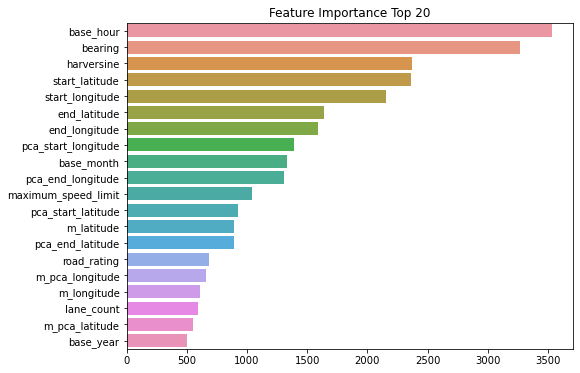

In [11]:
ft_importance_values = lgbm_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

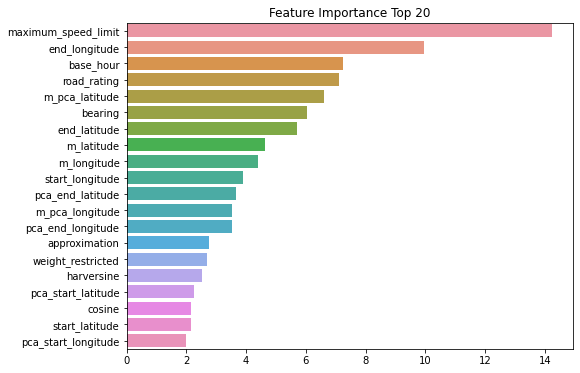

In [12]:
ft_importance_values = cat_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

### Make Submission File

In [13]:
sample = pd.read_csv('../data/raw/sample_submission.csv')
sample['target'] = lgbm_pred
display(sample)

,id,target
0,TEST_000000,24.462926
1,TEST_000001,44.929770
2,TEST_000002,61.233749
3,TEST_000003,36.251501
4,TEST_000004,41.577323
...,...,...
291236,TEST_291236,46.463290
291237,TEST_291237,52.464093
291238,TEST_291238,22.140445
291239,TEST_291239,25.542858


In [14]:
date = str(pd.Timestamp.now())[:10].replace('-','')
sample.to_csv(f'../data/submission/{date}.csv', index=False)